In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
x_train = pd.read_csv("./Training Data/Linear_X_Train.csv", delimiter = ",")

In [10]:
y_train = pd.read_csv("./Training Data/Linear_Y_Train.csv", delimiter = ",")

In [37]:
y_train = np.array(y_train)

In [40]:
y_train.shape

(3750, 1)

In [41]:
y_train = y_train.reshape(3750,)

In [5]:
type(x_train)

pandas.core.frame.DataFrame

In [42]:
y_train.shape

(3750,)

In [43]:
x_train = np.array(x_train)

In [44]:
x_train = x_train.reshape(3750,)

In [45]:
x_train.shape

(3750,)

In [56]:
def error(x,y,m,b):
    return (((y-m*x-b)**2).sum()).mean()

In [57]:
def step_gradient(x, y, learning_rate, m, b):
    slope_m = 0
    slope_b = 0
    k = x.shape[0]
    for j in range(k):
        slope_m = 2*(m*x[j]+b-y[j])*(x[j])/k
        slope_b = 2*(m*x[j]+b-y[j])/k
        m = m - learning_rate*slope_m
        b = b - learning_rate*slope_b
    return m, b

In [59]:
def gradient_descent(x, y, learning_rate = 0.1, num_epoches = 1000):
    m = 0
    b = 0
    print("start : ", error(x,y,m,b))
    for i in range(num_epoches):
        m,b = step_gradient(x,y,learning_rate,m,b)
        if(i%100 == 0):
            print(i, " : ", error(x,y,m,b), "m : ", m, "b : ", b)
    print("end : ", error(x,y,m,b), "m : ", m, "b : ", b)
    return m, b

In [60]:
def run(x, y):
    m, b = gradient_descent(x_train, y_train)
    return m, b

In [61]:
m, b = run(x_train, y_train)

start :  24661312.69673226
0  :  16873668.030442886 m :  14.387539955680827 b :  0.17367241781562956
100  :  716083.7524940188 m :  80.54614735404014 b :  3.7190428210877395
200  :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537
300  :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537
400  :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537
500  :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537
600  :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537
700  :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537
800  :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537
900  :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537
end :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984537


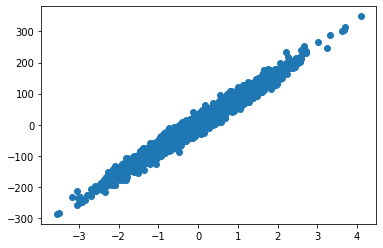

In [62]:
plt.scatter(x_train, y_train)
plt.show()

In [63]:
x_test = pd.read_csv("./Test Cases/Linear_X_Test.csv", delimiter = ",")

In [64]:
x_test = np.array(x_test)

In [65]:
x_test.shape

(1250, 1)

In [66]:
x_test = x_test.reshape(1250,)

In [67]:
m

80.5461475917841

In [68]:
b

3.719042961984537

In [70]:
y_pred = m*x_test-b

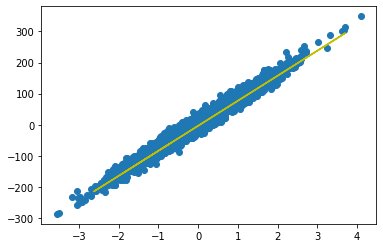

In [73]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, c = 'y')
plt.show()

In [74]:
y_pred

array([-154.98023091,  -73.71621592, -207.51548997, ...,    6.59149389,
        -26.1138997 ,  -58.52468995])

In [78]:
pd.DataFrame(y_pred, columns=['y']).to_csv("result.csv")